In [1]:
from photutils.segmentation import (SourceCatalog, deblend_sources, detect_sources, detect_threshold)
from photutils.segmentation import deblend_sources
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
from astropy.visualization import ZScaleInterval
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
#Abrimos los datos de los fits
img_b = fits.open('Img_B.fits')[0].data
img_v = fits.open('Img_V.fits')[0].data
hdr_b = fits.open('Img_B.fits')[0].header
hdr_v = fits.open('Img_V.fits')[0].header

In [3]:
#Threshold para detectar fuentes
threshold_b = detect_threshold(img_b, nsigma = 2)
threshold_v = detect_threshold(img_v, nsigma = 2.2)

#Detectamos fuentes
sour_b = detect_sources(img_b, threshold_b, npixels = 328)
sour_v = detect_sources(img_v, threshold_v, npixels = 492)
#Es arreglo de npixeles para que queden iguales la cantidad de fuente
print(sour_b, sour_v)

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 233
labels: [  1   2   3   4   5 ... 229 230 231 232 233] <photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 233
labels: [  1   2   3   4   5 ... 229 230 231 232 233]


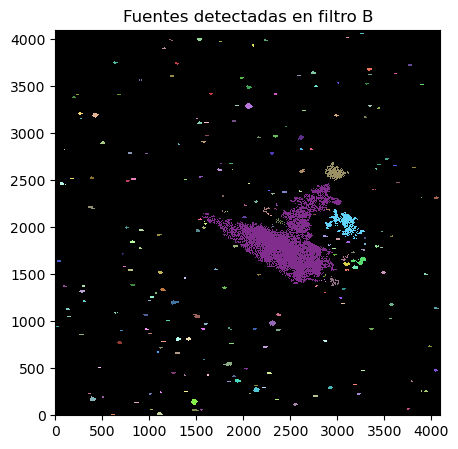

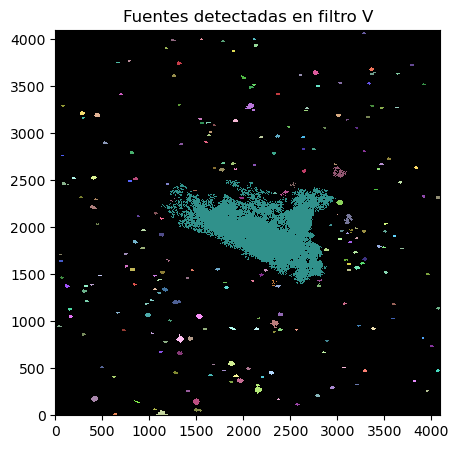

In [4]:
#Mapa de colores
cmap_sour_b = sour_b.make_cmap(seed=123)
cmap_sour_v = sour_v.make_cmap(seed=123)

#Graficamos fuentes
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_b, origin='lower', cmap=cmap_sour_b, interpolation='nearest')
plt.title('Fuentes detectadas en filtro B')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_v, origin='lower', cmap=cmap_sour_v, interpolation='nearest')
plt.title('Fuentes detectadas en filtro V')
plt.show()

In [20]:
#Separamos fuentes
deblend_b = deblend_sources(img_b, sour_b, npixels=100, nlevels=32, contrast=0.1)
deblend_v = deblend_sources(img_v, sour_v, npixels=40, nlevels=32, contrast=0.2)

print(deblend_b, deblend_v)

Deblending:   0%|          | 0/233 [00:00<?, ?it/s]

Deblending:   0%|          | 0/233 [00:00<?, ?it/s]

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 251
labels: [  1   2   3   4   5 ... 247 248 249 250 251] <photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 251
labels: [  1   2   3   4   5 ... 247 248 249 250 251]


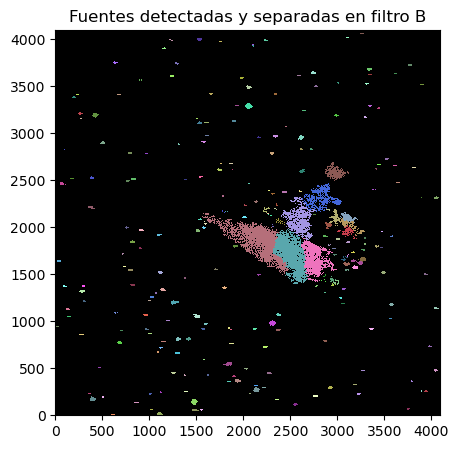

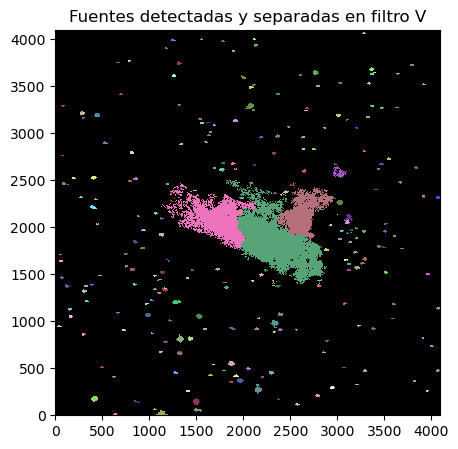

In [21]:
cmap_deblend_b = deblend_b.make_cmap(seed=123)
cmap_deblend_v = deblend_v.make_cmap(seed=123)

#Las vemos

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(deblend_b, origin='lower', cmap=cmap_deblend_b,interpolation='nearest')
plt.title('Fuentes detectadas y separadas en filtro B')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(deblend_v, origin='lower', cmap=cmap_deblend_v,interpolation='nearest')
plt.title('Fuentes detectadas y separadas en filtro V')
plt.show()

In [22]:
#Catalogo
cat_b = SourceCatalog(img_b, deblend_b)
cat_v = SourceCatalog(img_v, deblend_v)
tbl_b = cat_b.to_table()
tbl_v = cat_b.to_table()
print(tbl_b)
print(tbl_v)

C:\Users\Valem\anaconda3\envs\astro_env\lib\site-packages\gwcs\__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


label     xcentroid          ycentroid      ...     kron_flux      kron_fluxerr
                                            ...                                
----- ------------------ ------------------ ... ------------------ ------------
    1  616.7051492251867 5.3361771764062045 ...  74613.19518712313          nan
    2 1111.2746222560459  8.150943201313263 ...  498165.6185657375          nan
    3 1482.2701542745883  53.57375310643927 ... 365474.87661646656          nan
    4  1026.851805628249  58.15162087362821 ... 199662.24267827976          nan
    5 1559.8428185109142   55.3420722054873 ...  165581.2073332244          nan
    6 3760.4397921036757 62.639156680930036 ...  51351.21270100013          nan
    7 1478.6511974706582 140.32747490147193 ...  806131.8956624186          nan
    8 2553.8514977443865 111.74008470169021 ... 183628.54064860335          nan
    9  861.4471468246552 131.54516337364478 ... 173925.24590569828          nan
  ...                ...                

In [23]:
#Tablas
tabla_b = cat_b.to_table()['label','xcentroid','ycentroid','area','segment_flux']
tabla_v = cat_v.to_table()['label','xcentroid','ycentroid','area','segment_flux']

#Printeo las tablas con los datos
print(tabla_b, tabla_v)

label     xcentroid          ycentroid        area     segment_flux   
                                              pix2                    
----- ------------------ ------------------ ------- ------------------
    1  616.7051492251867 5.3361771764062045   477.0 19093.117948532104
    2 1111.2746222560459  8.150943201313263  1715.0 498229.24358558655
    3 1482.2701542745883  53.57375310643927  1417.0  73271.43035125732
    4  1026.851805628249  58.15162087362821   427.0 11394.849630355835
    5 1559.8428185109142   55.3420722054873   466.0 14881.796115875244
    6 3760.4397921036757 62.639156680930036   352.0 25065.635749816895
    7 1478.6511974706582 140.32747490147193  3357.0  801772.7522525787
    8 2553.8514977443865 111.74008470169021   950.0   56309.7133140564
    9  861.4471468246552 131.54516337364478   439.0 12901.638843536377
  ...                ...                ...     ...                ...
  242 2910.2459205274704 2018.4320833537809  3302.0 302927.87804222107
  243 

In [24]:
#Flujo real
tabla_b['segment_flux'] = tabla_b['segment_flux']/hdr_b['EXPTIME']
tabla_v['segment_flux'] = tabla_v['segment_flux']/hdr_v['EXPTIME']

print(tabla_b, tabla_v)

label     xcentroid          ycentroid        area     segment_flux   
                                              pix2                    
----- ------------------ ------------------ ------- ------------------
    1  616.7051492251867 5.3361771764062045   477.0  636.4372649510701
    2 1111.2746222560459  8.150943201313263  1715.0 16607.641452852884
    3 1482.2701542745883  53.57375310643927  1417.0 2442.3810117085773
    4  1026.851805628249  58.15162087362821   427.0  379.8283210118612
    5 1559.8428185109142   55.3420722054873   466.0  496.0598705291748
    6 3760.4397921036757 62.639156680930036   352.0  835.5211916605632
    7 1478.6511974706582 140.32747490147193  3357.0  26725.75840841929
    8 2553.8514977443865 111.74008470169021   950.0 1876.9904438018798
    9  861.4471468246552 131.54516337364478   439.0 430.05462811787925
  ...                ...                ...     ...                ...
  242 2910.2459205274704 2018.4320833537809  3302.0 10097.595934740702
  243 

In [25]:
#Magnitudes con los zeropoint de la calibracion
zp_b = 21.78705359242756
zp_v = 21.276957915057153

tabla_b['magnitude'] = zp_b - 2.5 * np.log10(tabla_b['segment_flux'])
tabla_v['magnitude'] = zp_v - 2.5 * np.log10(tabla_v['segment_flux'])
print(tabla_b, tabla_v)

label     xcentroid      ...    segment_flux        magnitude     
                         ...                                      
----- ------------------ ... ------------------ ------------------
    1  616.7051492251867 ...  636.4372649510701 14.777664590632295
    2 1111.2746222560459 ... 16607.641452852884 11.236283692024772
    3 1482.2701542745883 ... 2442.3810117085773 13.317520055224469
    4  1026.851805628249 ...  379.8283210118612 15.338085233021864
    5 1559.8428185109142 ...  496.0598705291748 15.048218353463653
    6 3760.4397921036757 ...  835.5211916605632 14.482159918540066
    7 1478.6511974706582 ...  26725.75840841929  10.71972849688192
    8 2553.8514977443865 ... 1876.9904438018798 13.603398438597527
    9  861.4471468246552 ... 430.05462811787925 15.203244527994515
  ...                ... ...                ...                ...
  242 2910.2459205274704 ... 10097.595934740702 11.776508622464588
  243  3152.817129909629 ... 11195.923281669617 11.66440380775

In [26]:
print(f"Magnitud filtro B: {np.sort(tabla_b['magnitude'])}")
print(f"Magnitud filtro V: {np.sort(tabla_v['magnitude'])}")


Magnitud filtro B:     magnitude     
------------------
 8.868602333686812
 9.130678663862229
 9.440599445530829
 9.492936871919015
 9.659714774873322
10.176408282244932
10.622836575951673
 10.71972849688192
  10.8203314882015
11.095958847713042
               ...
15.590268744563469
15.617557393455996
15.641653822771122
15.695057713753682
15.832017219549957
15.843528450431421
16.008473231379455
 16.04206384734591
  16.2920942325136
 16.45418008974154
Length = 251 rows
Magnitud filtro V:     magnitude     
------------------
 6.354942605032221
 7.056127539689802
 7.397635160181885
 8.631092537563255
 8.843684268376686
 9.029189926027136
 9.096096510630256
 9.148818138734253
 9.262793589798084
 9.328640376596347
               ...
14.351182139170655
14.368995067915929
14.644589409042737
14.774806691003775
14.790118865129308
 14.81536224562324
14.836010738521654
14.893432828794182
14.982099594144486
15.058192574617248
Length = 251 rows


In [27]:
B_V = tabla_v['magnitude']-tabla_b['magnitude']

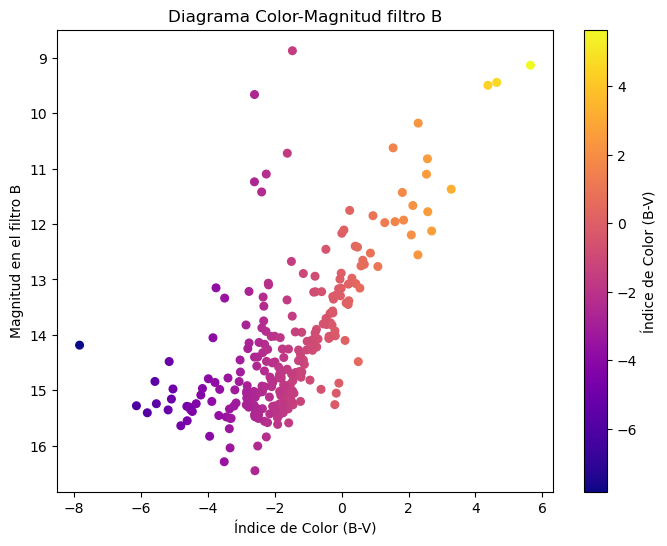

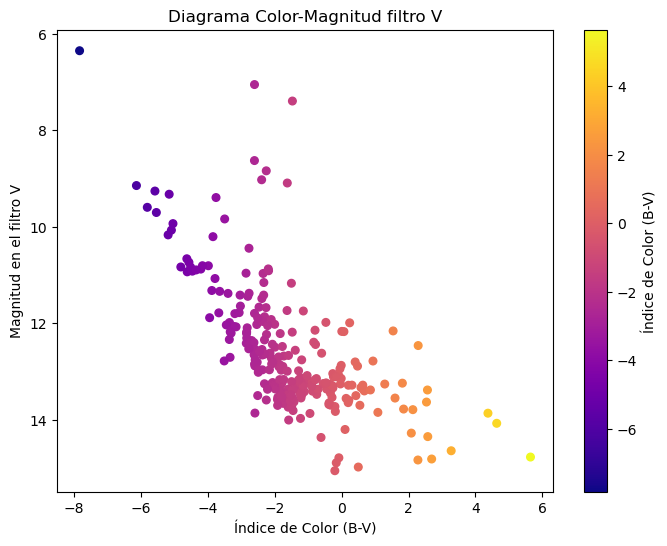

In [28]:
# Crear el diagrama color-magnitud
plt.figure(figsize=(8, 6))
plt.scatter(B_V, tabla_b['magnitude'], c=B_V, cmap='plasma', s = 30)
plt.colorbar(label="Índice de Color (B-V)")
plt.gca().invert_yaxis()  # Invertir el eje y para que las magnitudes más brillantes estén arriba

# Añadir etiquetas
plt.xlabel("Índice de Color (B-V)")
plt.ylabel("Magnitud en el filtro B")
plt.title("Diagrama Color-Magnitud filtro B")

plt.show()

# Crear el diagrama color-magnitud
plt.figure(figsize=(8, 6))
plt.scatter(B_V, tabla_v['magnitude'], c=B_V, cmap='plasma', s = 30)
plt.colorbar(label="Índice de Color (B-V)")
plt.gca().invert_yaxis()  # Invertir el eje y para que las magnitudes más brillantes estén arriba

# Añadir etiquetas
plt.xlabel("Índice de Color (B-V)")
plt.ylabel("Magnitud en el filtro V")
plt.title("Diagrama Color-Magnitud filtro V")

plt.show()